Complete all **Exercises**, and submit answers to **Questions** in the **Quiz: Week 2 Lab** on Coursera.


## Getting Started

### Load packages

In this lab we will explore some basic Bayesian inference using conjugate priors 
and credible intervals to examine some categorical and count data from the 
[CDC's Behavioral Risk Factor Surveillance System](http://www.cdc.gov/brfss/) 
(BRFSS). A subset of these data from 2013 have been made available in the 
`statsr` package, as usual we will first load the package and then the data set. 

Let's load the package,

In [1]:
library(tidyverse)
library(statsr)
data(brfss)

── Attaching packages ──────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



This data set contains 5000 observations of 6 variables:

variable         | description
---------------- | ---------------------------------------------
`weight`         |  Respondent's weight in pounds.
`height`         |  Respondent's height in inches.
`sex`            |  Respondent's sex
`exercise`       |  Has the respondent exercised in the last 30 days
`fruit_per_day`  |  How many servings of fruit does the respondent consume per day
`vege_per_day`   |  How many servings of dark green vegetables does the respondent consume per day

## Credible Interval Calculator

Recall that probability distribution (prior/posterior distribution) of a 
parameter that describes the distribution of the data is given by:

$$\begin{align*}
\text{Beta distribution} ~-~ & \pi(p; \alpha, \beta) = \text{Beta}(\alpha, \beta)\\
\text{Gamma distribution} ~-~ & \pi(\lambda; \alpha, \beta) = \text{Gamma}(\alpha, \beta)\\
\text{Normal distribution} ~-~ & \pi(\mu; \nu, \tau) = \mathscr{N}(\nu, \tau)
\end{align*}$$

Here, $p$, $\lambda$, and $\mu$ are the variables of their own distributions 
(the values of them define the distributions of the data), and other parameters 
such as $\alpha,\ \beta,\ \nu$, and $\tau$ are the parameters of the 
distributions of $p$, $\lambda$, and $\mu$.

(**Note:** In this lab, we use the following definition of Gamma distribution:
$$ \pi(\lambda; \alpha, \beta) = \text{Gamma}(\alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$$
This definition of the Gamma distribution is different from the one introduced 
in the video lecture.)

Below is an interactive app for visualizing posterior distributions and credible 
intervals of $p$, $\lambda$, and $\mu$ given different values of parameters. We 
will use this app to explore how both our choice of prior distribution, as well 
as our data, affect the posterior distribution and the credible interval for 
$p$, $\lambda$, and $\mu$.

Note that this app assumes you now the posterior distribution as well as the 
parameters of this distribution. In the remainder of the lab we will walk you 
through how to calculate the posterior distribution in the Beta-Binomial 
Conjugacy and the Gamma-Poisson Conjugacy cases based on real world data from 
`BRFSS`. Then you will be asked to calculate the credible interval using codes 
similar to the one shown under the graph of the app.

First, let us do some exercises to learn how to use this app.

In [2]:
# credible_interval_app()

Suppose the posterior distribution of $\mu$ follows a Normal distribution with 
mean 10 and variance 5. Which of the following are the bounds of a 95% credible 
interval for $\mu$? Answer this question using the app.

1. (-1.96, 1.96)
2. (0.419, 0.872)
3. (0.959, 3.417)
4. (5.618, 14.382)


**Answer**: 4.

Confirm your answer by running the code given below the distribution plot in 
the app.

In [3]:
# Type your code for Exercise 1 here.
qnorm(c(0.025, 0.975), mean = 10, sd = 2.236)

[1]  5.617521 14.382479

Suppose the posterior distribution of $p$ follows a Beta distribution with 
$\alpha = 2$ and $\beta = 5$. Which of the following are the bounds of a 90% 
credible interval for $p$? Answer this question using the app.

1. (-1.678, 5.678)
2. (0.043, 0.641)
3. (0.063, 0.582)
4. (0.071, 0.949)

**Answer**: 3.

Confirm your answer by running the code given below the distribution plot in 
the app.

In [4]:
# Type your code for the Exercise 2 here.
qbeta(c(0.05, 0.95), shape1 = 2, shape2 = 5)

[1] 0.06284989 0.58180341

Suppose the posterior distribution of $\lambda$ follows a Gamma distribution 
with $\alpha = 4$ and $\beta = 8$. Which of the following are the bounds of a 
99% credible interval for $\lambda$? Answer this question using the app.

1. (-3.284, 11.284)
2. (0.069, 0.693)
3. (0.084, 1.372)
4. (0.171, 0.969)

**Answer**: 3.

Confirm your answer by running the code given below the distribution plot in 
the app.

In [5]:
# Type your code for the Exercise 3 here.
qgamma(c(0.005, 0.995), shape = 4, rate = 8)

[1] 0.08402582 1.37218469

## Beta-Binomial Conjugacy

As we discussed in the videos, the Beta distribution is conjugate to the 
Binomial distribution - meaning that if we use a Beta prior for the parameter 
$p$ of the Binomial distribution then the posterior distribution of $p$ after 
observing data will be another Beta distribution. 

$$ \pi(p) = \text{Beta}(a, b) $$
$$ x\,|\,n,p ~\sim~ \text{Binom}(n,p) $$
$$ p \,|\, x,n ~\sim~ \text{Beta}(\alpha, \beta).$$

Our goal with inference in general is to take specific observations (data) and 
use them to make useful statements about unknown population parameters of 
interest. The Beta-Binomial Conjugacy is a Bayesian approach for inference about 
a single population proportion $p$. Whereas with the frequentist approach we 
used $\hat{p} = x / n$ we will now just use $x$ and $n$ directly with $x$ being 
the number of successes obtained from $n$ identical Bernoulli trials. (A 
Bernoulli trial is a random experiment with exactly two possible outcomes, 
"success" and "failure", in which the probability of success is the same every 
time the experiment is conducted.) As such, we can view $x$ as a Binomial random 
variable with $n$ the number of trials, and $p$ the probability of success.
 
To complete our Bayesian approach of inference, all we need is to define our 
prior beliefs for $p$ by defining a prior distribution. Our choice of the prior 
hyperparameters ($a$ and $b$) should reflect our prior beliefs about $p$. In 
the following, we will use the term **hyperparameter** to define parameters of 
prior/posterior distributions, and the term **parameter** to define the unknown 
parameters of the likelihood, such as $p$. For most conjugate distributions 
there is usually a straight forward interpretation of these hyperparameters as 
the previously observed data -- in the case of the Beta-Binomial Conjugacy, we 
can think of our hyperparameters as representing $a-1$ previous successes and $b-1$ previous failures.

### Data and the updating rule

We will start by performing inference on the sex ratio of respondents to 
`BRFSS`, we can define success as being `Female` and we would like to make 
some statement about the overall sex ratio of American adults based on our 
sample from `BRFSS`. We will do this by estimating $p$, the true proportion 
of females in the American population, using credible intervals. For each 
credible interval you compute, always check back in with your intuition, which 
hopefully says that $p$ should be around 0.5 since we would expect roughly 50% 
females and 50% males in the population.

Here is the observed sex distribution in the data:

In [6]:
table(brfss$sex)


  Male Female 
  2414   2586 

Let's store the relevant, total sample size and number of females, for use in 
later calculations:

In [7]:
n <- length(brfss$sex)
x <- sum(brfss$sex == "Female")

For each observed data point from a Binomial ($n$ and $x$) we can calculate 
the values of the posterior parameters using the following updating rule:

$$ \alpha = a + x $$
$$ \beta = b + n - x $$

From the data we now have $x = `r x`$ (the number of females), and 
$n - x = `r n - x`$ (the number of males). We'll start with a Beta prior where 
$a = 1$ and $b = 1$. Remember that this is equivalent to a Uniform distribution. 
By combining the data with the prior, we arrive at a posterior where 

$$ p \,|\, x,n ~\sim~ \text{Beta}(\alpha = 1 + `r x`,~ \beta = 1 + `r n - x`) $$


What is the 95% credible interval for $p$, the proportion of females in the 
population, based on the posterior distribution obtained with the updating rule 
shown above. Use the credible interval app to answer this question.

1. (0.500, 0.536)
2. (0.503, 0.531) 
3. (0.507, 0.530)
4. (0.468, 0.496)

**Answer**: 2. (0.503, 0.531)


In [8]:
qbeta(c(0.025, 0.975), shape1 = 1+x, shape2 = 1+n-x)

[1] 0.5033405 0.5310327

Which of the following is the correct Bayesian interpretation of this interval?

1. The probability that the true proportion of females lies in this interval is either 0 or 1.
2. The probability that the true proportion of females lies in this interval is 0.95.
3. 95\% of the time the true proportion of females is in this interval. 
4. 95\% of true proportions of females are in this interval. 

**Answer**: 2.

***
Let's now use a more informative prior that reflects a **stronger** belief that 
the sex ratio should be 50-50. For this, we use a Beta prior with hyperparameters 
$a = 500$ and $b = 500$.


Confirm by plotting the following two Beta distributions $\text{Beta}(a = 1, b = 1)$ 
and $\text{Beta}(a = 500, b = 500)$ using the app above to show that the 
$\text{Beta}(a = 500, b = 500)$ distribution is centered around 0.5 and much more 
narrow than the uniform distribution, i.e. $Beta(a = 1, b = 1)$.

What is the 95% credible interval for $p$, the proportion of females in the 
population, based on a prior distribution of $\text{Beta}(a = 500, b = 500)$.

**Hint:** You need to determine the hyperparameters of the posterior distribution, 
then use the app to construct the credible interval.

1. (0.498, 0.531)
2. (0.500, 0.528)
3. (0.504, 0.532)
4. (0.502, 0.527)

**Answer**: 4. (0.502, 0.527)

In [9]:
a <- 500
b <- 500

qbeta(c(0.025, 0.975), shape1 = a+x, shape2 = b+n-x)

[1] 0.5016840 0.5269736

Let's consider one other prior distribution: $\text{Beta}(a = 5, b = 200)$. 

Which of the following is the center of the $\text{Beta}(a = 5, b = 200)$ 
distribution?

**Hint:** modify the code under the distribution plot to get the 
center.

1. approximately 0.03
2. approximately 0.15
3. approximately 0.50
4. approximately 0.97

**Answer**: 1. 0.03

In [10]:
# Type your code for Question 7 here.
a <- 5
b <- 200

mean(qbeta(c(0.025, 0.975), shape1 = a, shape2 = b))

[1] 0.02872269

What is the 95% credible interval for $p$, the proportion of females in the 
population, based on a prior distribution of $\text{Beta}(a = 5, b = 200)$.

**Hint:** You need to determine the posterior distribution first, then use the 
app to construct the credible interval.

1. (0.503, 0.531)
2. (0.499, 0.535)
3. (0.486, 0.509)
4. (0.484, 0.511)

**Answer**: 4. (0.484, 0.511)


In [11]:
a <- 5
b <- 200

qbeta(c(0.025, 0.975), shape1 = a+x, shape2 = b+n-x)

[1] 0.4842100 0.5113728

In summary, when we used a prior distribution that was centered around a 
realistic value for $p$ (the center is around 0.5), the credible interval we 
obtained was also more realistic. However when we used a strong prior distribution 
that was centered around a clearly unrealistic value for $p$ (say the 
$\text{Beta}(5, 200)$ prior), the credible interval we obtained did not match the 
distribution of the data (with the proportion of female respondents 
$2586/(2586+2414) \approx 0.517$). Hence, a good prior helps, however a bad 
prior can hurt your results. 

Next, let's turn our attention to the `exercise` variable, which indicates 
whether the respondent exercised in the last 30 days. While for the `sex` variable 
we had some intuition about the true proportion of females (we would expect it 
to be around 0.5), many of us probably do not have a strong prior belief about 
the proportion of Americans who exercise. In this case we would be more inclined 
to use a non-informative prior, e.g. a uniform distribution, which says that $p$ 
is equally likely to be anywhere between 0 and 1.

Here is the observed exercise distribution in the data:

In [12]:
table(brfss$exercise)


 Yes   No 
3868 1132 

What is the 90% credible interval for $p$, the proportion of Americans who 
exercise, based on a uniform prior distribution?

1. (0.762, 0.785)
2. (0.764, 0.783) 
3. (0.718, 0.737)
4. (0.758, 0.789)

**Answer**: 2. (0.764, 0.783)

In [13]:
n <- length(brfss$exercise)
x <- sum(brfss$exercise == "Yes")

a <- 1
b <- 1

qbeta(c(0.05, 0.95), shape1 = a+x, shape2 = b+n-x)

[1] 0.7636949 0.7831620

## Gamma-Poisson Conjugacy

Since the Poisson distribution describes the number of counts in a given 
interval, we will use this distribution to model the `fruit_per_day` variable 
which records the servings of fruit the respondents consume per day. The Poisson 
distribution has a single parameter, $\lambda$, which is the expected number of 
counts per time period. 

The Gamma-Poisson conjugacy is another example of conjugate families where we use 
the Gamma distribution as the prior for the count parameter $\lambda$. In this 
lab, we use the following definition of Gamma distribution:
$$ \pi(\pi; \alpha, \beta) = \text{Gamma}(\alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}$$

With Bayes' Rule and the likelihood which is given by the Poisson distribution, 
we will get a Gamma posterior for $\lambda$.

$$ \pi(\lambda) = \text{Gamma}(a,b) $$
$$ x\,|\,\lambda ~\sim~ \text{Poisson}(\lambda) $$
$$ \lambda \,|\, x ~\sim~ \text{Gamma}(\alpha,\beta).$$

Once again, our choice of the prior parameters ($a$ and $b$) should reflect our 
prior beliefs about the parameter $\lambda$. In the case of the Gamma-Poisson 
conjugacy, we can view $a$ as the number of total counts and $b$ as the prior 
number of observations. For example, setting $a = 12$ and $b = 3$ reflects a 
belief based on data that 3 respondents on average consume a total of 12 fruits 
per day. At a first glance, this might sound equivalent to setting $a = 4$ and 
$b = 1$ or $a = 120$ and $b = 30$, however these three distributions, 
$Gamma(a = 4, b = 1)$, $Gamma(a = 12, b = 3)$, and $Gamma(a = 120, b = 30)$, 
while they all have the same expected value 4, differ in their spreads which 
indicates a different degree of belief about the parameter $\lambda$.

<div class="exercise">
Use the app to plot the following three prior Gamma distributions, 
$Gamma(a = 4, b = 1)$, $Gamma(a = 12, b = 3)$, and $Gamma(a = 120, b = 30)$. 
Confirm that they all have the same center but different spreads. Order them in 
ascending order of spreads, from least to most variable.
</div>

### Data and the updating rule

For each observed data point from the Poisson distribution ($x$) we can calculate 
the values of the posterior parameters using the following updating rule:

$$ \alpha = a + x $$
$$ \beta = b + 1 $$

However in this case we have 5000 observations and we would like to avoid updates 
every single count individually. As we saw last week, we can use our subsequentially 
updated posterior as a new prior. As such, a more general multi-observation 
updating rule is

$$ \alpha = a + \sum_{i = 1}^n x_i $$
$$ \beta = b + n $$

Using the multi-observation updating rule, what should the posterior distribution 
be when the hyperparameters of the Gamma prior are $a = 4$ and $b = 1$, and we 
have observed the data $x = \{2, 3, 4, 5, 4\}$.

1. Gamma($a = 22$, $b = 6$) 
2. Gamma($a = 18$, $b = 5$)
3. Gamma($a = 18$, $b = 6$)
4. Gamma($a = 19$, $b = 8$)

**Answer**: 1. Gamma($a = 22$, $b = 6$)

The government recommends that Americans consume approximately 5 servings of 
fruits per day. Which of the following represents a weak prior that Americans 
on average follow this recommendation?

1. Gamma($a = 1$, $b = 5$)
2. Gamma($a = 5$, $b = 1$)
3. Gamma($a = 100$, $b = 500$)
4. Gamma($a = 500$, $b = 100$)

**Answer**: 2.

Using the correct prior distribution from the previous question and the data of 
`fruit_per_day` in the `BRFSS` dataset, calculate the hyperparameters of the 
posterior distribution.

1. Gamma($\alpha = 8114$, $\beta = 5000$)
2. Gamma($\alpha = 8118$, $\beta = 5001$)
3. Gamma($\alpha = 8119$, $\beta = 5001$)
4. Gamma($\alpha = 8115$, $\beta = 5005$)

**Answer**: 3. Gamma($\alpha = 8119$, $\beta = 5001$)

In [14]:
# Type your code for Question 12 here.
# We're gonna take the prior a and b values

a <- sum(brfss$fruit_per_day)
b <- length(brfss$fruit_per_day)
cat(a, b)

8114 5000

Using the correct posterior distribution from the previous question, calculate 
the 90% credible interval for $\lambda$, the expected number of servings of 
fruit Americans consume per day.

1. (1.575, 1.668) 
2. (1.588, 1.659) 
3. (1.592, 1.651) 
4. (1.594, 1.653) 

**Answer**: 4. (1.594, 1.653)

In [15]:
qgamma(c(0.05, 0.95), shape = 8119, rate = 5001)

[1] 1.593953 1.653225

Based on this result, do Americans appear to follow the government guidelines 
which recommend consuming 5 servings of fruits per day?

* Yes
* No

**Answer**: No, it's really far away from this value.

<div class="exercise">
Repeat the preceding analysis for number of servings of vegetables per day 
(`vege_per_day`), and evaluate whether Americans follow the government guidelines 
which recommend consuming 5 servings of vegetables per day.
</div>

In [16]:
# Type your code for the Exercise 6 here.
a <- sum(brfss$vege_per_day)
b <- length(brfss$vege_per_day)

sum_xi = 5
n = 1

alpha = a + sum_xi
beta = b + n

cat(a, alpha, b, beta)

qgamma(c(0.05, 0.95), shape = alpha, rate = beta)

5429 5434 5000 5001

[1] 1.062451 1.110941

Clearly the population consumes in average about 1 vegetable serving per day. **Significantly** away from what is suggested.

Let's take a look at the significance of the values obtained from a classical frequentist approach.

In [17]:
s = sd(brfss$vege_per_day)
SE = s/sqrt(b)
mean = mean(brfss$vege_per_day)
z = (mean - 5)/SE
pnorm(z, lower.tail = TRUE)

[1] 0

Single numerical variable
n = 5000, y-bar = 1.0858, s = 0.8228
H0: mu = 5
HA: mu != 5
t = -336.3892, df = 4999
p_value = < 0.0001

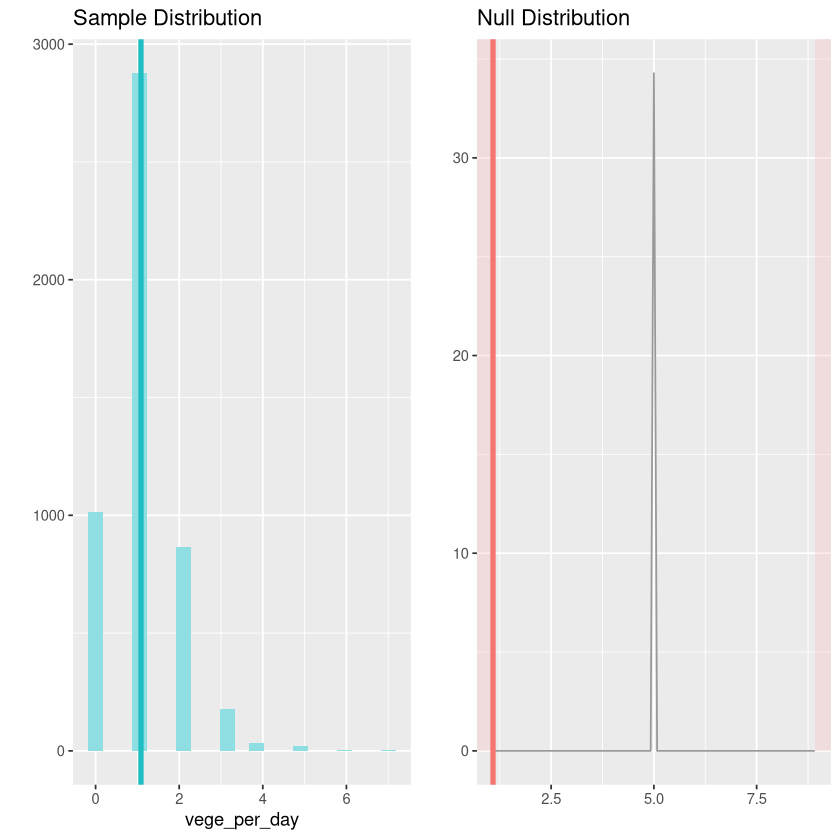

In [19]:
inference(y = vege_per_day, data = brfss, statistic = "mean", type = "ht", null = 5, 
          alternative = "twosided", method = "theoretical")

From a frequentist point of view, we should reject $H_0$ since $\alpha << 0.05$ hence well below the significance level.

This work is licensed under [GNU General Public License v3.0](https://www.gnu.org/licenses/quick-guide-gplv3.html).